Test of stable single-cell system, using drag lifetime from JASON model

In [1]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime
import numpy as np
R = 6371 # radius of earth in km
alt = 600 # altitude of Starlink satellites (km)
dh = 25 # height of band (km)
V = 4*np.pi*dh*(R+alt)**2 # volume of band
S_i = [0]
S_di = [0]
D_i = [0]
N_i = int(2.5e-8*V)
lam = [2000]
T = 20
def drag_lifetime_loc(hmax, hmin, a_over_m): # something's not right with this
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell([S_i], [S_di], [D_i], [N_i], [alt], [dh], [lam], drag_lifetime_loc, tau_do=[[2]])

In [2]:
atmosphere.run_sim_precor(T)
t = atmosphere.get_t()
S = atmosphere.get_S()[0][0]
S_d = atmosphere.get_SD()[0][0]
D = atmosphere.get_D()[0][0]
N = atmosphere.get_N()[0]
C = atmosphere.get_C()[0]

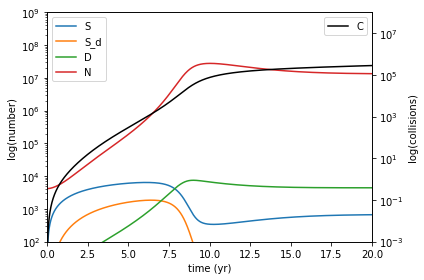

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S, label='S')
ax1.plot(t, S_d, label='S_d')
ax1.plot(t, D, label='D')
ax1.plot(t, N, label='N')
ax1.set_ylim(100, 1e9)
ax1.set_xlim(0,T)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('log(collisions)')  # we already handled the x-label with ax1
ax2.plot(t, C, label='C', color='k')
ax2.set_ylim(1e-3, 1e8)
ax2.set_yscale('log')
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Test of debris flowing through two layers, using drag lifetime from JASON model

In [1]:
from NCell import NCell
import numpy as np
R = 6371 # radius of earth in km
alt1, alt2 = 600, 625 # altitude of Starlink satellites (km)
dh = 25 # height of bands (km)
V1, V2 = 4*np.pi*dh*(R+alt1)**2, 4*np.pi*dh*(R+alt2)**2 # volume of bands
S_i = [0]
S_di = [0]
D_i = [0]
N_i1, N_i2 = int(2.5e-5*V1), int(2.5e-5*V2)
lam = [0]
T = 50
def drag_lifetime(_a, _b, _c):
    return 5
atmosphere = NCell([S_i, S_i], [S_di, S_di], [D_i, D_i], [N_i1, N_i2], [alt1, alt2], [dh, dh], [lam, lam], drag_lifetime)

In [2]:
atmosphere.run_sim_precor(T, upper=False)
t = atmosphere.get_t()
N1, N2 = atmosphere.get_N()

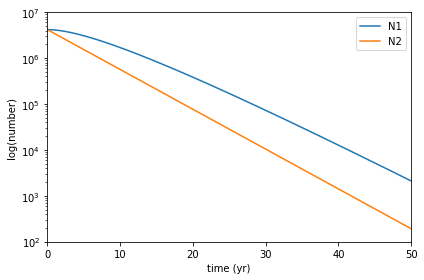

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, N1, label='N1')
ax1.plot(t, N2, label='N2')
ax1.set_ylim(100, 1e7)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Test of debris flowing through multiple cells, using proper drag lifetimes

In [1]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime 
import numpy as np
R = 6371 # radius of earth in km
dh = 50 # height of band (km)
alts = np.arange(600, 910, dh)
V = 4*np.pi*dh*(R+alts)**2 # volume of band
dhs = np.zeros(len(alts))
dhs.fill(dh)
S_i = [[0]]*len(alts)
S_di = [[0]]*len(alts)
D_i = [[0]]*len(alts)
N_i = np.zeros(len(alts), dtype=np.int64)
N_i[-1] = int(2.5e-8*V[-1])
lam = [[0]]*len(alts)
T = 30
def drag_lifetime_loc(hmax, hmin, a_over_m):
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell(S_i, S_di, D_i, N_i, alts, dhs, lam, drag_lifetime_loc)

In [2]:
atmosphere.run_sim_precor(T, upper=False)
t = atmosphere.get_t()
N = atmosphere.get_N() 

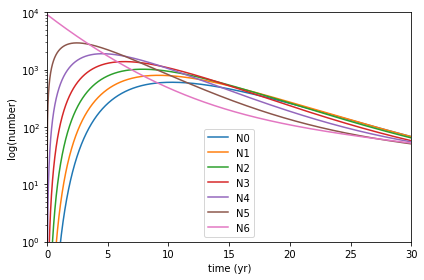

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
for i in range(0, len(N)):
    ax1.plot(t, N[i], label='N'+str(i))
ax1.set_ylim(1, 1e4)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Test stiff N-cell system with multiple shells getting launched satellites

In [1]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime 
import numpy as np
R = 6371 # radius of earth in km
dh = 50 # height of band (km)
alts = np.arange(600, 910, dh)
V = 4*np.pi*dh*(R+alts)**2 # volume of band
dhs = np.zeros(len(alts))
dhs.fill(dh)
S_i = [[0]]*len(alts)
S_di = [[0]]*len(alts)
D_i = [[0]]*len(alts)
N_i = np.zeros(len(alts), np.int64)
for i in range(len(alts)):
    N_i[i] = int(2.5e-8*V[i])
lam = [[0]]*len(alts)
lam[0][0] = 500
lam[3][0] = 500
lam[-1][0] = 50
T = 150
def drag_lifetime_loc(hmax, hmin, a_over_m):
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell(S_i, S_di, D_i, N_i, alts, dhs, lam, drag_lifetime_loc)

In [2]:
atmosphere.run_sim_precor(T, mindtfactor=10000)

In [9]:
S0, S1, S2 = atmosphere.get_S()[0][0], atmosphere.get_S()[3][0], atmosphere.get_S()[-1][0]
SD0, SD1, SD2 = atmosphere.get_SD()[0][0], atmosphere.get_SD()[3][0], atmosphere.get_SD()[-1][0]
D0, D1, D2 = atmosphere.get_D()[0][0], atmosphere.get_D()[3][0], atmosphere.get_D()[-1][0]
N0, N1, N2 = atmosphere.get_N()[0], atmosphere.get_N()[3], atmosphere.get_N()[-1]
t = atmosphere.get_t()

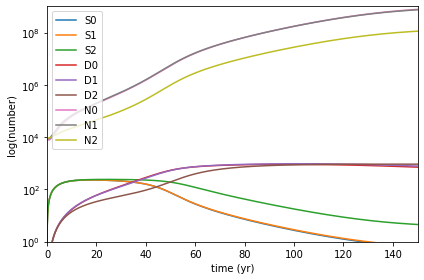

In [16]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S0, label='S0')
ax1.plot(t, S1, label='S1')
ax1.plot(t, S2, label='S2')
ax1.plot(t, D0, label='D0')
ax1.plot(t, D1, label='D1')
ax1.plot(t, D2, label='D2')
ax1.plot(t, N0, label='N0')
ax1.plot(t, N1, label='N1')
ax1.plot(t, N2, label='N2')
ax1.set_ylim(1, 1e9)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [1]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime 
import numpy as np
R = 6371 # radius of earth in km
dh = 25 # height of band (km)
alts = np.arange(300, 810, dh)
V = 4*np.pi*dh*(R+alts)**2 # volume of band
dhs = np.zeros(len(alts))
dhs.fill(dh)
S_i = [[0]]*len(alts)
S_i[10][0] = 2400
S_di = [[0]]*len(alts)
D_i = [[0]]*len(alts)
N_i = np.zeros(len(alts), np.int64)
del_t = [[0]]*len(alts)
tau_min = np.zeros(len(alts))
for i in range(len(alts)):
    N_i[i] = int(2.5e-8*V[i])
    del_t[i][0] = np.inf
    tau_min[i] = 1/1000
lam = [[0]]*len(alts)
T = 5
def drag_lifetime_loc(hmax, hmin, a_over_m):
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell(S_i, S_di, D_i, N_i, alts, dhs, lam, drag_lifetime_loc, del_t=del_t, tau_min=tau_min)

In [2]:
from scipy.stats import norm
mean = -2.6
for i in range(len(atmosphere.logL_edges) - 1):
    if atmosphere.logL_edges[i] <= mean and atmosphere.logL_edges[i+1] > mean:
        atmosphere.cells[10].N_bins[0][i,2] += int(10**8)
print(atmosphere.cells[10].N_bins[0][:,2])

sat = np.random.uniform(300-25/2,550-25/2,size=1000)
for i in range(len(atmosphere.cells)):
    bot, top = atmosphere.cells[i].alt - atmosphere.cells[i].dh/2, atmosphere.cells[i].alt + atmosphere.cells[i].dh/2
    atmosphere.cells[i].satellites[0].S[0] += len(sat[(sat >= bot) & (sat < top)])

[1.01000000e+02 1.00000046e+08 2.10000000e+01 1.20000000e+01
 1.00000000e+00 3.00000000e+00 2.60000000e+01 5.50000000e+01
 2.50000000e+01 9.00000000e+00]


In [3]:
atmosphere.run_sim_precor(T, mindtfactor=10000)

In [4]:
t = atmosphere.get_t()
S0, S1, S2 = atmosphere.get_S()[10][0], atmosphere.get_S()[5][0], atmosphere.get_S()[0][0]
SD0, SD1, SD2 = atmosphere.get_SD()[10][0], atmosphere.get_SD()[5][0], atmosphere.get_SD()[0][0]
D0, D1, D2 = atmosphere.get_D()[10][0], atmosphere.get_D()[5][0], atmosphere.get_D()[0][0]
N0, N1, N2 = atmosphere.get_N()[10], atmosphere.get_N()[5], atmosphere.get_N()[0] 

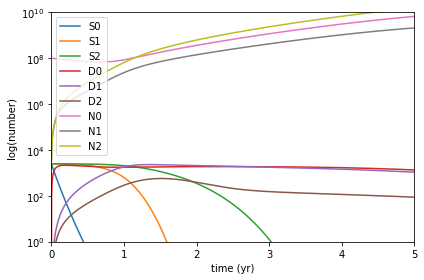

In [5]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S0, label='S0')
ax1.plot(t, S1, label='S1')
ax1.plot(t, S2, label='S2')
ax1.plot(t, D0, label='D0')
ax1.plot(t, D1, label='D1')
ax1.plot(t, D2, label='D2')
ax1.plot(t, N0, label='N0')
ax1.plot(t, N1, label='N1')
ax1.plot(t, N2, label='N2')
ax1.set_ylim(1, 1e10)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

One-cell system with two satellite types

In [1]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime
import numpy as np
R = 6371 # radius of earth in km
alt = 600 # altitude of Starlink satellites (km)
dh = 25 # height of band (km)
V = 4*np.pi*dh*(R+alt)**2 # volume of band
S_i = [0,0]
S_di = [0,0]
D_i = [0,0]
N_i = int(2.5e-8*V)
lam = [2000,2000]
AM_sat = [[1/(20*2.2), 1/(40*2.2)]]
tau_do = [[2,1]]
T = 50
def drag_lifetime_loc(hmax, hmin, a_over_m): # something's not right with this
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell([S_i], [S_di], [D_i], [N_i], [alt], [dh], [lam], drag_lifetime_loc, AM_sat=AM_sat, tau_do=tau_do)

In [2]:
atmosphere.run_sim_precor(T, mindtfactor=5000)

In [5]:
t = atmosphere.get_t()
S0 = atmosphere.get_S()[0][0]
SD0 = atmosphere.get_SD()[0][0]
D0 = atmosphere.get_D()[0][0]
N0 = atmosphere.get_N()[0]
S1 = atmosphere.get_S()[0][1]
SD1 = atmosphere.get_SD()[0][1]
D1 = atmosphere.get_D()[0][1]

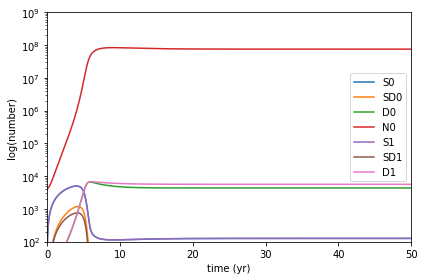

In [6]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S0, label='S0')
ax1.plot(t, SD0, label='SD0')
ax1.plot(t, D0, label='D0')
ax1.plot(t, N0, label='N0')
ax1.plot(t, S1, label='S1')
ax1.plot(t, SD1, label='SD1')
ax1.plot(t, D1, label='D1')
ax1.set_ylim(100, 1e9)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Multi-Cell System with Two Satellite Types

In [7]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime 
import numpy as np
R = 6371 # radius of earth in km
dh = 50 # height of band (km)
alts = np.arange(600, 910, dh)
V = 4*np.pi*dh*(R+alts)**2 # volume of band
dhs = np.zeros(len(alts))
dhs.fill(dh)
S_i = [[0,0]]*len(alts)
S_di = [[0,0]]*len(alts)
D_i = [[0,0]]*len(alts)
N_i = np.zeros(len(alts), np.int64)
for i in range(len(alts)):
    N_i[i] = int(2.5e-8*V[i])
lam = [[0,0]]*len(alts)
lam[0] = [500, 500]
lam[3] = [500, 250]
lam[-1][0] = 50
AM_sat = [[1/(20*2.2), 1/(40*2.2)]]*len(alts)
T = 150
def drag_lifetime_loc(hmax, hmin, a_over_m):
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell(S_i, S_di, D_i, N_i, alts, dhs, lam, drag_lifetime_loc, AM_sat=AM_sat)

In [8]:
atmosphere.run_sim_precor(T, mindtfactor=10000)

In [9]:
t = atmosphere.get_t()
S0 = atmosphere.get_S()[0][0]
SD0 = atmosphere.get_SD()[0][0]
D0 = atmosphere.get_D()[0][0]
N0 = atmosphere.get_N()[0]
S1 = atmosphere.get_S()[0][1]
SD1 = atmosphere.get_SD()[0][1]
D1 = atmosphere.get_D()[0][1]

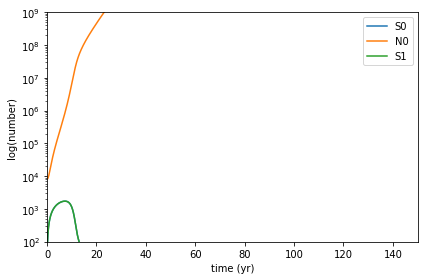

In [11]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S0, label='S0')
#ax1.plot(t, SD0, label='SD0')
#ax1.plot(t, D0, label='D0')
ax1.plot(t, N0, label='N0')
ax1.plot(t, S1, label='S1')
#ax1.plot(t, SD1, label='SD1')
#ax1.plot(t, D1, label='D1')
ax1.set_ylim(100, 1e9)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()